In [ ]:
# Standard libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import src.dataloading as dataloading


<module 'test_feather' from '/home/oskar/Documents/Jupyter/Sentinel/test_feather.py'>

# Process Data

In [ ]:


for year in range(2017, 2022):
    df, correlation_filters = dataloading.preprocess_data("data/dataset_2024-09-11/" + str(year) + ".feather", save="processed_" + str(year))

          | 0/11  [elapsed: 00:00]

          | 0/13  [00:00<?]

          | 0/2  [00:00<?]

          | 0/25  [00:00<?]

          | 0/1  [00:00<?]

  0%|          | 0/148 [00:00<?, ?it/s]

          | 0/643 0.5 [00:00<?]

          | 0/643 0.9 [00:00<?]

          | 0/643 0.99 [00:00<?]

# Inspect Data

In [18]:
df = pd.read_feather("data/full_data/processed/processed_2017.feather")
df.columns

Index(['index', 'polygon_id', 'based_on_pid', 'grdkod_mar', 'x', 'y',
       'elevation', 'slope', 'ph_idw', 'p_al_idw',
       ...
       'topology_1', 'topology_2', 'topology_3', 'topology_4', 'topology_5',
       'topology_6', 'topology_7', 'topology_8', 'topology_9', 'topology_10'],
      dtype='object', length=901)

In [20]:
rem = df.columns

sen2 = [c for c in df.columns if ("L1C" in c ) or ("L2A" in c)]
rem = [c for c in rem if c not in sen2]

sen1 = [c for c in df.columns if ("sigma" in c )]
rem = [c for c in rem if c not in sen1]

theta = [c for c in df.columns if ("theta" in c )]
rem = [c for c in rem if c not in theta]

weather = [c for c in df.columns if ("weather" in c )]
rem = [c for c in rem if c not in weather]

info = ["index", "polygon_id", "grdkod_mar",  "x", "y", "yield", "based_on_pid"]
rem = [c for c in rem if c not in info]

soil = rem

soil

['elevation',
 'slope',
 'ph_idw',
 'p_al_idw',
 'k_al_idw',
 'mg_al_idw',
 'ca_al_idw',
 'k_mg_kvot_idw',
 'dsms_ler',
 'dsms_fao',
 'dsms_sand',
 'dsms_silt',
 'week_13_days_above_1.0mm',
 'week_14_days_above_1.0mm',
 'week_15_days_above_1.0mm',
 'week_16_days_above_1.0mm',
 'week_17_days_above_1.0mm',
 'week_18_days_above_1.0mm',
 'week_19_days_above_1.0mm',
 'week_20_days_above_1.0mm',
 'week_21_days_above_1.0mm',
 'week_22_days_above_1.0mm',
 'week_23_days_above_1.0mm',
 'week_24_days_above_1.0mm',
 'week_25_days_above_1.0mm',
 'week_26_days_above_1.0mm',
 'week_27_days_above_1.0mm',
 'week_28_days_above_1.0mm',
 'week_29_days_above_1.0mm',
 'week_30_days_above_1.0mm',
 'week_22_days_above_15.0mm',
 'week_23_days_above_15.0mm',
 'week_24_days_above_15.0mm',
 'week_25_days_above_15.0mm',
 'week_26_days_above_15.0mm',
 'week_27_days_above_15.0mm',
 'week_28_days_above_15.0mm',
 'week_29_days_above_15.0mm',
 'week_30_days_above_15.0mm',
 'week_31_days_above_15.0mm',
 'week_32_days_ab

# Cool pictures

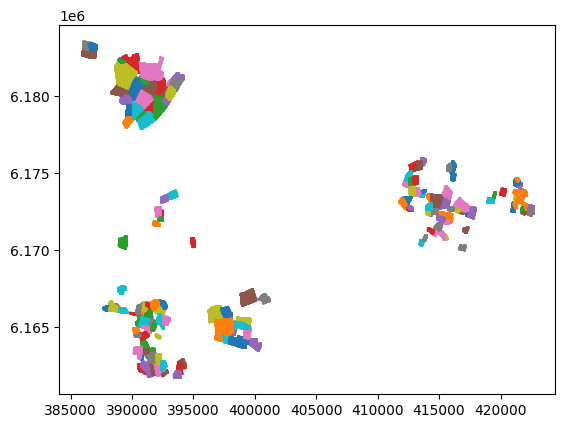

In [47]:
for pid in set(df["polygon_id"]):
    pdf = df[(df["polygon_id"] == pid)]
    plt.scatter(pdf.x, pdf.y, s=1, alpha=0.5)

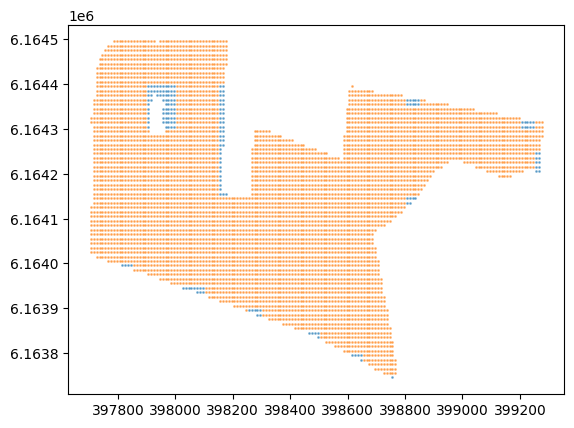

In [64]:
pid = list(set(df["polygon_id"]))[10]
pdf = df[(df["polygon_id"] == pid) & (np.isnan(df['dsms_ler']))]
plt.scatter(pdf.x, pdf.y, s=1, alpha=0.5)
pdf = df[(df["polygon_id"] == pid) & (np.isnan(df['dsms_ler']) == False)]
plt.scatter(pdf.x, pdf.y, s=1, alpha=0.5)

# Test Smoothing

In [111]:
year = 2019
df = pd.read_feather("data/dataset_2024-09-09/" + str(year) + ".feather")

pid = 2869761
#df = df[df['polygon_id'] == pid]

In [34]:
import cv2

In [ ]:
df = dataloading.yield_smoothing(df, [1,3,6])

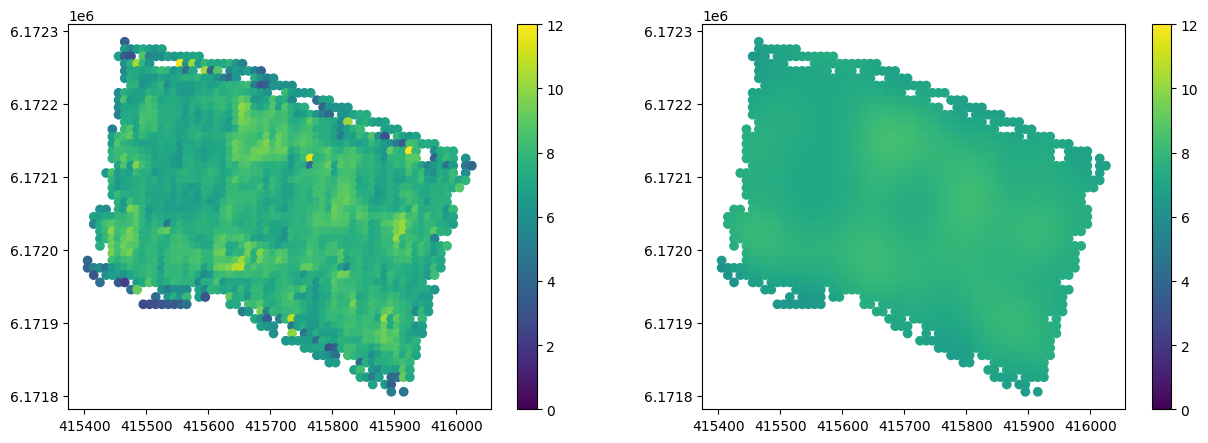

In [113]:
#pid = list(set(df.polygon_id))[1]
pdf = df[df.polygon_id == pid]

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(pdf.x, pdf.y, c=[-10 if np.isnan(y) else y for y in pdf['yield']])
plt.clim(0,12)
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(pdf.x, pdf.y, c=[-10 if np.isnan(y) else y for y in pdf['yield_3']])
plt.clim(0,12)
plt.colorbar()